<h3>Import Libraries</h3>

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  
import matplotlib.pyplot as plt

<h3>Load the dataset</h3>

In [54]:
file_path = 'E:\CodeSoft\IMDb_Movies.csv'

# Attempt to read the file with a different encoding
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print(df.head())  # Preview the data
except Exception as e:
    print(f"Error: {e}")

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

<h3>Data Exploration</h3>

In [55]:
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga

<h3>Data Cleaning</h3>

In [56]:
# Drop rows where the target variable 'Rating' is missing
df = df.dropna(subset=['Rating'])

# Clean the 'Year' column: Ensure it's a string before extracting digits
df['Year'] = df['Year'].astype(str).str.extract(r'(\d+)').astype(float)

# Clean the 'Duration' column: Extract numeric value (minutes)
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Clean 'Votes' column by converting to string, removing commas, and converting back to numeric
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(float)

# Handle missing values in numeric columns (e.g., 'Year', 'Duration', 'Votes') using mean strategy
imputer = SimpleImputer(strategy='mean')
df[['Year', 'Duration', 'Votes']] = imputer.fit_transform(df[['Year', 'Duration', 'Votes']])

# Handle missing categorical values (e.g., 'Genre', 'Director', 'Actor 1', etc.) using the most frequent strategy
imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = imputer_cat.fit_transform(df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])

<h3>Feature Engineering</h3>

In [57]:
# Encode categorical variables using LabelEncoder
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<h3>Define Features (X) and Target (y)</h3>

In [58]:
X = df[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

<h3>Split the dataset</h3>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h3>Normalize numeric features</h3>

In [60]:
scaler = StandardScaler()
X_train[['Year', 'Duration', 'Votes']] = scaler.fit_transform(X_train[['Year', 'Duration', 'Votes']])
X_test[['Year', 'Duration', 'Votes']] = scaler.transform(X_test[['Year', 'Duration', 'Votes']])

<h3>Apply Multiple Models</h3>

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[model_name] = {"MSE": mse, "R²": r2}
        print(f"{model_name} Performance:")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R-Squared: {r2:.2f}\n")
    except Exception as e:
        print(f"Error with {model_name}: {e}")


Linear Regression Performance:
Mean Squared Error: 1.68
R-Squared: 0.10

Decision Tree Performance:
Mean Squared Error: 2.47
R-Squared: -0.33

Random Forest Performance:
Mean Squared Error: 1.22
R-Squared: 0.35

Gradient Boosting Performance:
Mean Squared Error: 1.18
R-Squared: 0.37



<h3>Visualize Model Comparison</h3>

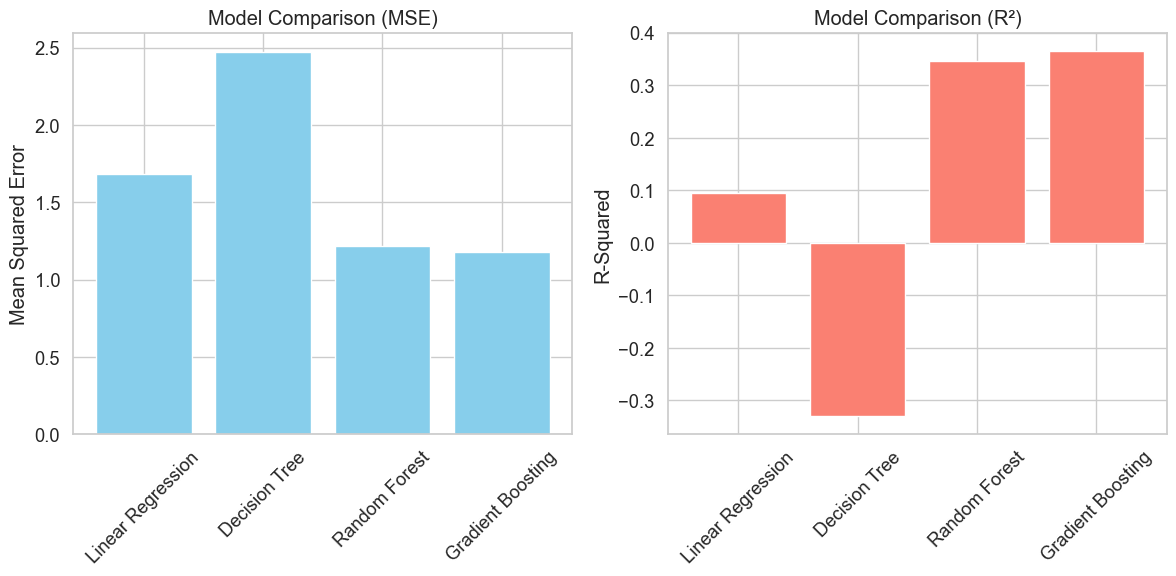

In [62]:
model_names = list(results.keys())
mse_values = [results[model]["MSE"] for model in model_names]
r2_values = [results[model]["R²"] for model in model_names]

plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Model Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='salmon')
plt.title('Model Comparison (R²)')
plt.ylabel('R-Squared')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



<h3>Feature Importance (Random Forest)</h3>

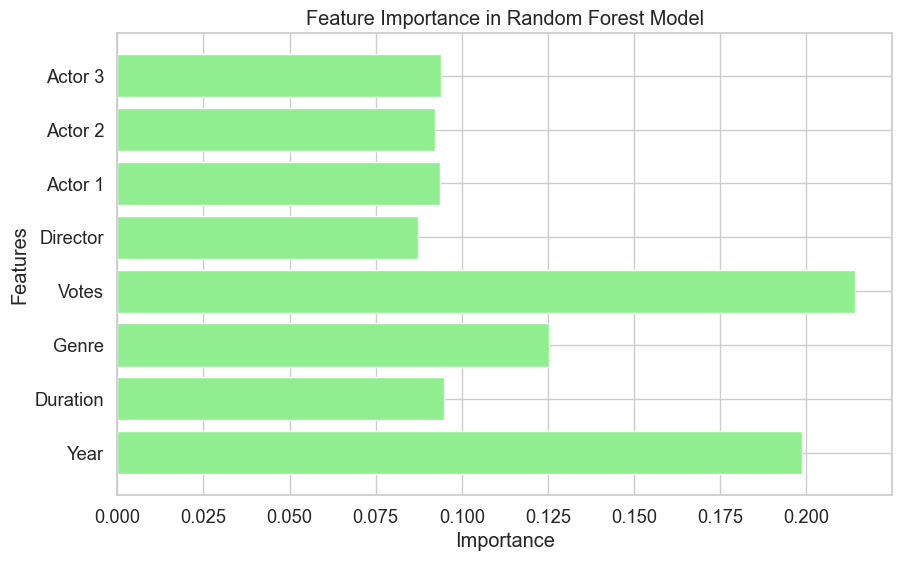

In [63]:
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()